<a href="https://colab.research.google.com/github/RabbitKM/Exercise/blob/main/ML_classification_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 測試參數 (Parameters)

In [130]:
# sklearn.datasets.load_wine
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
from sklearn.datasets import load_wine
# load_wine
# load_wine()
load_wine(return_X_y=True)
# load_wine(as_frame=True)
# load_wine(return_X_y=True, as_frame=True)

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

## 2. 測試方法 (Returns)

In [131]:
load_wine().data
load_wine().target
load_wine().feature_names
load_wine().target_names
load_wine(as_frame=True).frame
load_wine().DESCR
# 下載完整描述
with open("DESCR.txt", "w") as fp:
  fp.write(load_wine().DESCR)

## 3. 資料預處理

In [132]:
# 1. pandas格式
df = load_wine(as_frame=True).frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [133]:
# 2. numpy格式
import pandas as pd
import numpy as np
# 訓練資料
x = np.array(df.drop(columns="target"))
df.drop(columns="target")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [134]:
# 驗證資料
y = np.array(df[["target"]])
df[["target"]]

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [135]:
# 再隨機個別切2份 (9:1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)
# 看一下切的狀況
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 13) (18, 13) (160, 1) (18, 1)


## 4.1 決策樹分類器

In [136]:
# 丟入訓練資料
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'proline <= 755.0\ngini = 0.652\nsamples = 160\nvalue = [55, 66, 39]\nclass = class_1'),
 Text(0.25, 0.5, 'color_intensity <= 4.85\ngini = 0.475\nsamples = 97\nvalue = [2, 62, 33]\nclass = class_1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.171\nsamples = 65\nvalue = [2, 59, 4]\nclass = class_1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.17\nsamples = 32\nvalue = [0, 3, 29]\nclass = class_2'),
 Text(0.75, 0.5, 'flavanoids <= 2.165\ngini = 0.279\nsamples = 63\nvalue = [53, 4, 6]\nclass = class_0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]\nclass = class_2'),
 Text(0.875, 0.16666666666666666, 'gini = 0.07\nsamples = 55\nvalue = [53, 2, 0]\nclass = class_0')]

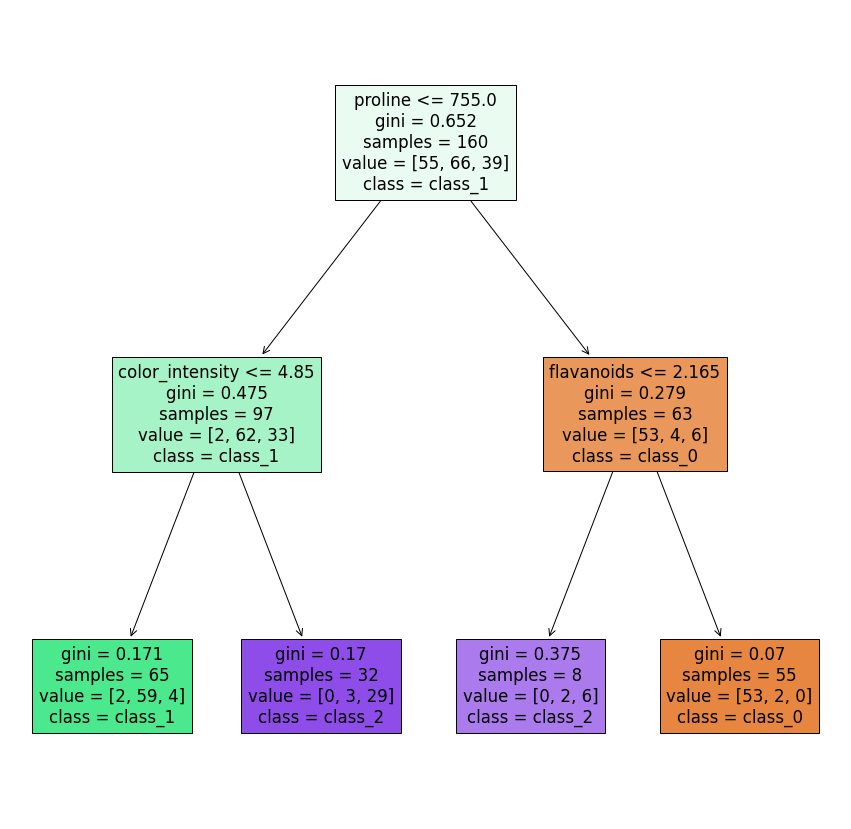

In [137]:
# 畫圖看結果
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
wine = load_wine()
plt.figure(figsize=(15, 15))
plot_tree(clf, 
    feature_names=wine["feature_names"],
    class_names=wine["target_names"],
    filled=True)

In [138]:
# 丟入測試資料+評估
from sklearn.metrics import accuracy_score 
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9444444444444444